<a href="https://colab.research.google.com/github/MAboElFottouh/AMIT/blob/main/bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [132]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [133]:
data = pd.read_csv("/content/bank-full.csv", sep=";")

In [134]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [135]:
# Drop 'duration' column
data.drop('duration',axis=1, inplace= True)

In [136]:
data.replace('unknown',np.nan,inplace=True)

In [137]:
data.drop('poutcome',axis=1, inplace= True)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [139]:
data.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
campaign         0
pdays            0
previous         0
y                0
dtype: int64

In [140]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

#encode diagnosis values

In [141]:
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,4]=le.fit_transform(data.iloc[:,4])
data.iloc[:,6]=le.fit_transform(data.iloc[:,6])
data.iloc[:,7]=le.fit_transform(data.iloc[:,7])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,14]=le.fit_transform(data.iloc[:,14])


In [142]:
data.replace(np.nan,data['job'].mode()[0],inplace=True)
data.replace(np.nan,data['education'].mode()[0],inplace=True)
data.replace(np.nan,data['contact'].mode()[0],inplace=True)

In [143]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,3,-1,0,1
45207,71,5,0,0,0,1729,0,0,0,17,9,2,-1,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,5,184,3,1
45209,57,1,1,1,0,668,0,0,1,17,9,4,-1,0,0




```
# This is formatted as code
```

#Check Balancing

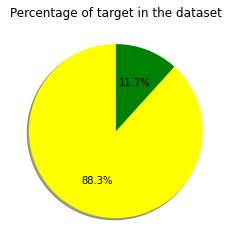

In [144]:
from matplotlib import pyplot as plt
sizes = data['y'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [145]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [146]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,2.763841,40.197828,0.580323,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,63.000000,871.000000,275.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


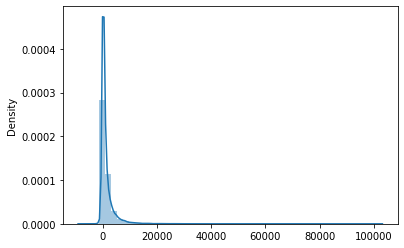

In [147]:
sns.distplot(x=data['balance'])

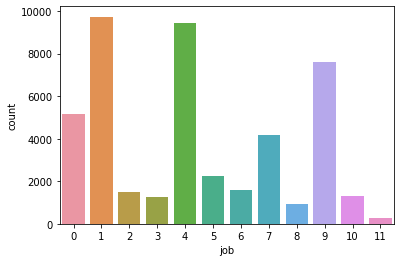

In [148]:
sns.countplot(x='job',data=data)

# Feature Selection

#Correlation


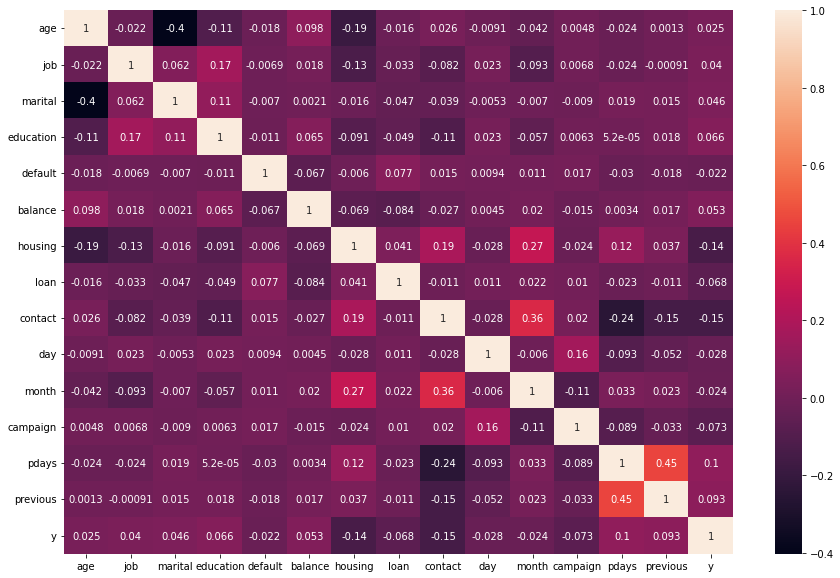

In [149]:
co=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=co,annot=True)

In [150]:
corr=data.corr()
columns=np.full(corr.shape[0],False,dtype=bool)
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [151]:
for i in range(0,corr.shape[-1]):
    if abs(corr.iloc[i,-1])>0.1:
        columns[i]=True

In [152]:
selected_columns=data.columns[columns]

In [153]:
selected_columns

Index(['housing', 'contact', 'pdays', 'y'], dtype='object')

In [154]:
high_features=data[selected_columns]
high_features.head()

,housing,contact,pdays,y
0,1,2,-1,0
1,1,2,-1,0
2,1,2,-1,0
3,1,2,-1,0
4,0,2,-1,0


In [155]:
data_copy=data.drop(selected_columns,axis=1)

In [156]:
data_copy.head()

,age,job,marital,education,default,balance,loan,day,month,campaign,previous
0,58,4,1,2,0,2143,0,5,8,1,0
1,44,9,2,1,0,29,0,5,8,1,0
2,33,2,1,1,0,2,1,5,8,1,0
3,47,1,1,3,0,1506,0,5,8,1,0
4,33,11,2,3,0,1,0,5,8,1,0


In [157]:
X=data_copy.values

# Feature extraction 

In [158]:
from sklearn.preprocessing import Normalizer 
nor=Normalizer()
X=nor.fit_transform(X)

In [159]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_components=pca.fit_transform(X)

In [160]:
variance_eplained=pca.explained_variance_ratio_
comulative_variance=np.cumsum(variance_eplained)

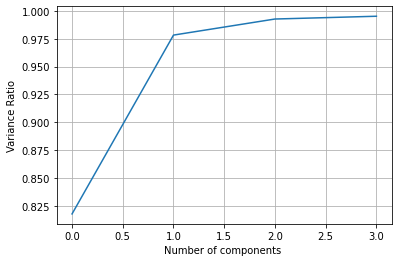

In [161]:
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(comulative_variance)
plt.xlabel('Number of components ')
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [162]:
pca.explained_variance_ratio_

array([0.81796687, 0.16025254, 0.01440161, 0.00249042])

In [163]:
pca_data=pd.DataFrame(data=pca_components)

In [164]:
new_data=pd.concat([high_features,pca_data],axis=1)
new_data.head()

,housing,contact,pdays,y,0,1,2,3
0,1,2,-1,0,-0.345147,0.107375,-0.007641,-0.000766
1,1,2,-1,0,0.358054,-0.475550,-0.212687,0.081683
2,1,2,-1,0,0.858053,-0.460226,-0.223973,-0.045130
3,1,2,-1,0,-0.343584,0.103403,-0.008316,-0.002402
4,0,2,-1,0,0.879888,-0.431742,-0.204931,0.201366


In [165]:
new_data['target']=new_data['y']

In [166]:
new_data.drop('y',axis=1, inplace= True)

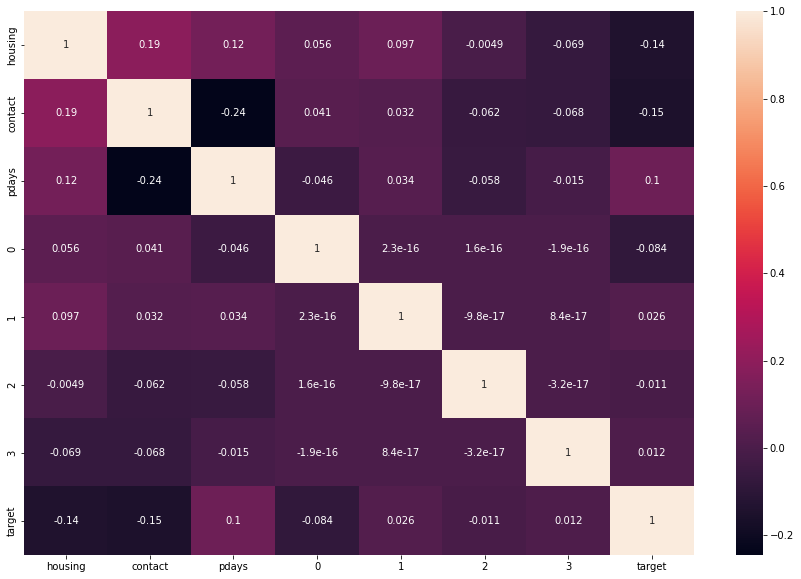

In [167]:
coo=new_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=coo,annot=True)

#Split Data

#over_sampling

In [168]:
from sklearn.model_selection import train_test_split
y=new_data.iloc[:,-1].values
X=new_data.iloc[:,:-1].values
#train_X,test_X,train_y,test_y = train_test_split(X,y)

In [173]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
print("Before OverSampling count of labels : {} ".format(Counter(new_data.target.values)))
smote=SMOTE()

X_ov,y_ov=smote.fit_resample(new_data.iloc[:,:-1].values,new_data.iloc[:,-1].values)
print("After OverSampling count of labels : {} ".format(Counter(y_ov)))


Before OverSampling count of labels : Counter({0: 39922, 1: 5289}) 
After OverSampling count of labels : Counter({0: 39922, 1: 39922}) 


In [174]:
train_X,test_X,train_y,test_y = train_test_split(X_ov,y_ov)

## Model 

In [175]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

DT= DecisionTreeClassifier(max_depth=5,min_samples_split=4,min_samples_leaf=3)
                           #,max_features=6)
DT.fit(train_X,train_y)
# Predict classes given the validation features
pred_y_DT = DT.predict(test_X)
pred_y_DT_train = DT.predict(train_X)

# Calculate the accuracy as our performance metric
accuracy_DT = metrics.accuracy_score(test_y, pred_y_DT)
accuracy_DT_train = metrics.accuracy_score(train_y, pred_y_DT_train)

print("Accuracy: ", accuracy_DT)
print("Accuracy: ", accuracy_DT_train)

Accuracy:  0.6744652071539502
Accuracy:  0.6783060300920127


# Evalution 

In [176]:
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=DT.predict(train_X)


print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

Accuracy : 0.6783060300920127
Recall :  0.623493374175934
precsiion :  0.7018214526647177
F1 score : 0.66034276042034


In [177]:
#On test Set 
y_pred=DT.predict(test_X)

print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

Accuracy : 0.6744652071539502
Recall :  0.6173139158576052
precsiion :  0.6922204581537764
F1 score : 0.6526248262589543


45211